A comparison between the DOW and the S&P 500

When calculating index change, there are a couple ways to run this analysis. The first being - to calculate change from the new value to the initial value or by calculating change from the new value to the previous value. 

Below you will see two of the following charts: 

1. A chart that compares the index performance of the DOW and S&P 500 by calculating change from a new value to an intial value (December 01 2022 - Janauary 01 2023)
2. A chart that compares the index performance of the DOW and S&P 500 by calculating change from a new value to a previous value (December 01 2022 - December 31 2022)

The charts visually represent these analyses, allowing readers to compare and contrast the performance of the DOW and S&P 500 indices based on chosen methods. A chart that measures index performance by using its inital value will have a better visualization of how the index has changed over the course of a year or more while a chart that measures index performance by using its previous value will have captured better day to day insights and fluctuations in volatily. 

Libraries used: pandas, matplot, numpy, yfinance

In [299]:
# libraries (yfinance, pandas, and matplot)
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [300]:
# defining start date and finish date of data
start_date = '2022-01-01'
end_date = '2023-01-01'

start_date_short = '2022-12-01'
end_date_short = '2022-12-31'

In [301]:
# downloading data using yfinance (yahoo finance)
dow = yf.download('^DJI', start = start_date, end = end_date)
sp500 = yf.download('^GSPC', start = start_date, end = end_date)

dow1 = yf.download('^DJI', start = start_date_short, end = end_date_short)
sp5002 = yf.download('^GSPC', start = start_date_short, end = end_date_short)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [302]:
# selecting closing prices
dow_close = dow['Close']
sp500_close = sp500['Close']

dow1_close = dow1['Close']
sp5002_close = sp5002['Close']

In [303]:
# calculating percentage change from each index value
dow_percentageiv = (dow_close / dow_close.iloc[0] * 100) - 100
sp500_percentageiv = (sp500_close / sp500_close.iloc[0] * 100) - 100 

In [304]:
# calculating percentage change from each previous value
dow_percentagepv = dow1_close.pct_change() * 100
sp500_percentagepv = sp5002_close.pct_change() * 100

In [305]:
# merging into a single dataframe - two columns (Dow, S&P 500)
df_percentageiv = pd.DataFrame({'Dow': dow_percentageiv, 'S&P 500': sp500_percentageiv})   

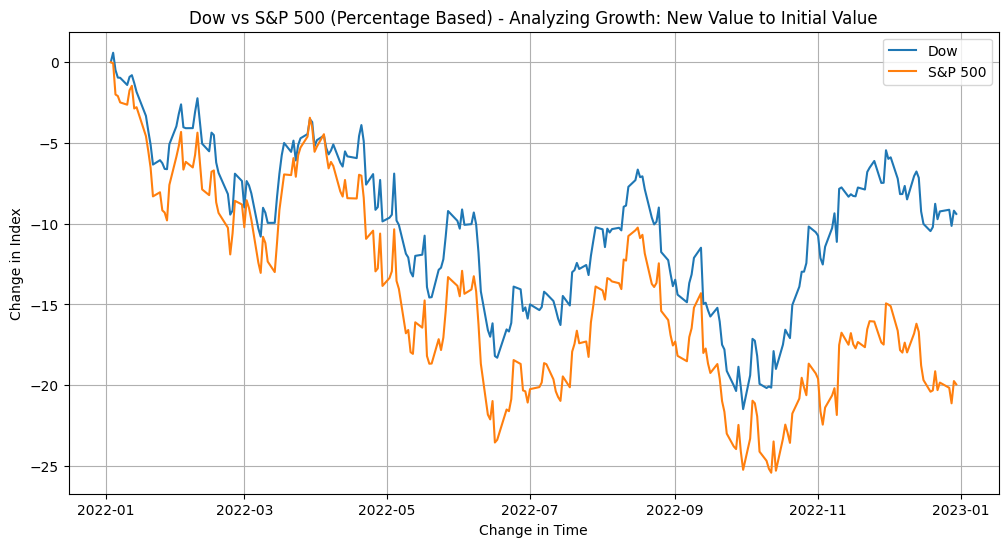

In [306]:
# plotting data
plt.figure(figsize=(12,6))
plt.plot(df_percentageiv.index, df_percentageiv['Dow'], label = 'Dow')
plt.plot(df_percentageiv.index, df_percentageiv['S&P 500'], label = 'S&P 500')
plt.title("Dow vs S&P 500 (Percentage Based) - Analyzing Growth: New Value to Initial Value")
plt.xlabel("Change in Time")
plt.ylabel("Change in Index")
plt.legend()
plt.grid()
plt.show()

In [307]:
# creating a new dataframe that captures the change from a new value to a previous value 
df_percentagepv = pd.DataFrame({'Dow': dow_percentagepv, 'S&P 500': sp500_percentagepv})

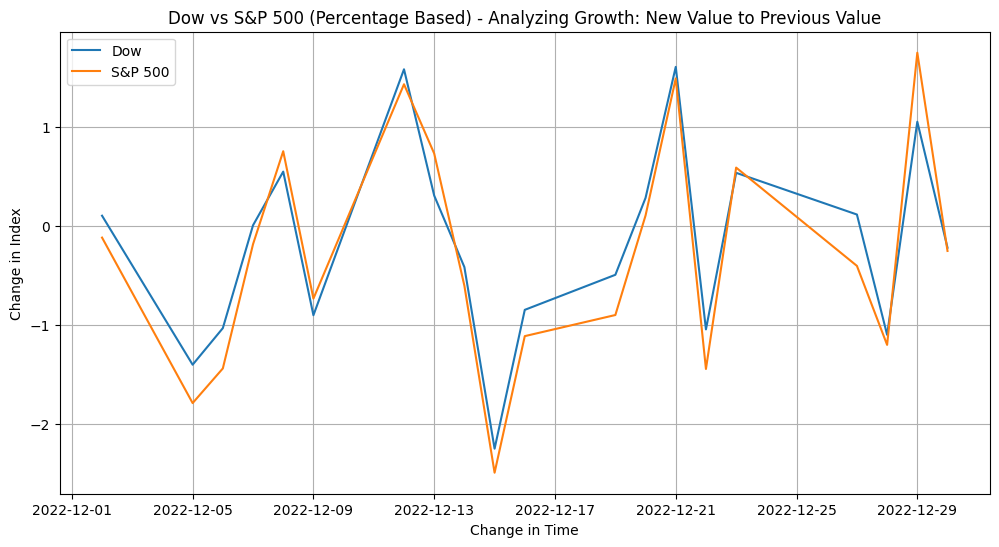

                 Dow   S&P 500
Date                          
2022-12-01       NaN       NaN
2022-12-02  0.101373 -0.119466
2022-12-05 -1.402205 -1.789421
2022-12-06 -1.033260 -1.439919
2022-12-07  0.004709 -0.186237


In [308]:
# plotting new dataframe
plt.figure(figsize=(12,6))
plt.plot(df_percentagepv.index, df_percentagepv['Dow'], label ='Dow')
plt.plot(df_percentagepv.index, df_percentagepv['S&P 500'], label ='S&P 500')
plt.title("Dow vs S&P 500 (Percentage Based) - Analyzing Growth: New Value to Previous Value")
plt.xlabel('Change in Time')
plt.ylabel('Change in Index')
plt.legend()
plt.grid()
plt.show()


print(df_percentagepv.head())